# Example simple graph

In [75]:
import numpy as np
import tensorflow as tf

np.random.seed(101)
tf.set_random_seed(101)

In [76]:
# Create random data points
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [77]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [78]:
# Create placeholder for random uniform objects
a = tf.placeholder(tf.float32)
a

<tf.Tensor 'Placeholder_17:0' shape=<unknown> dtype=float32>

In [79]:
b = tf.placeholder(tf.float32)
b

<tf.Tensor 'Placeholder_18:0' shape=<unknown> dtype=float32>

In [80]:
add_op = a + b
mul_op = a * b

# a and b are placeholder, if it gets used in a computation you must pass it in via feed_dict. 
# If you don't it's an error.

with tf.Session() as sess:
    # add_result = sess.run(add_op, feed_dict={a:10, b:20})
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

Simple expressions, assume that for some reason we want to evaluate the below function in tensorflow way:
```
z = wx + b
```
where w = placeholder, x = variable, b = bias

x = 2
w = 5
b = 10
z will be 20

In [2]:
import tensorflow as tf

sess = tf.InteractiveSession()

# Define constants
x = tf.constant(2, name="x", dtype=tf.float32)
w = tf.constant(5, name="w", dtype=tf.float32)
b = tf.constant(10, name="b", dtype=tf.float32)

# Define operations
Wx = tf.multiply(w, x)
a = tf.add(Wx, b)

# Create variable
z = tf.Variable(a)

# Initialize variable
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(z))

sess.close()

20.0


In [82]:
import tensorflow as tf

sess = tf.InteractiveSession()

n_features = 10
n_dense_neurons = 3

x = tf.placeholder(tf.float32, (None, n_features))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

xW = tf.matmul(x, W)
Z = tf.add(xW, b)

# provide the result to Activation function like sigmoid, Tanh, ReLU etc.
a = tf.sigmoid(z)

init = tf.global_variables_initializer()

sess.run(init)
layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

print(layer_out)

sess.close()

1.0


## Simple Regression example

In [83]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [84]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

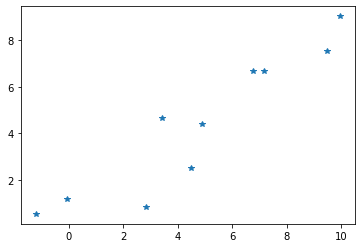

In [85]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(x_data, y_label, '*')

y = mx + b


In [86]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [87]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [88]:
# cost function
error = 0

for x, y in zip(x_data, y_label):
    y_hat = m * x + b # Linear equation
    
    error += (y - y_hat)**2

In [89]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [90]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m, b]) 

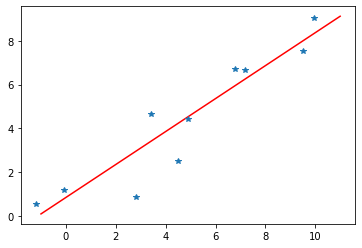

In [91]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')
